# House pricing prediction

**Mamadou Baïlo CISSE**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

In this project, we built some machine learning models to predict house prices.
After analyzing the dataset using data description file along with some exploration steps, we selected three sets of features based on their correlation with the SalePrice (dependent variable). We then built three models (model10, model15, model20) against those three sets of features (**10, 15, 20 most correlated features**) and demonstrated that the model model20 was the one that performed the best on the training data regarding **the three metrics $R^2$ (0.88), MAE - Mean Absolute Error - (18 356.27) ,and MSE - Mean Square Error (600 490 969.09)**. 

However, we were not performing well on the test dataset. We then decided to perform **further transformations** by including categorical (ordinal and nominal) variables to build a new model "NewModel". We selected the best correlated categorical features by using **most-frequent imputation** (to deal with null values) and **ANOVA** (ANalysis Of VAriance) technique.

By doing so, we improved :
+ $R^2$ metric from **0.88** (model20) to **0.95** (NewModel) on the train dataset.
+ $R^2$ metric from **0.74** to **0.78** on the test dataset.


[Back to top](#Index)


## 1. Introduction

The goal of this data science project is to build an efficient **machine learning model** to predict house prices. To achieve this, our supervised model (the price is the label) will learn from a training data set in which we'll select the most relevant features that best explain the house prices.

This notebook shows the different steps and code to achieve our goal.

+ In the first part of the notebook :
    - We will make some **data explorations** along with **data cleaning** by dealing with duplicate values (if there are any), null values... 
    - Then we will use the **correlation technique** (Pearson correlation matrix) to select the features that are best correlated with the dependant variable (house price)
    - Then we will **build our model** and make some accuracy analysis on three different set of variables.
    - Finally, we are going to verify our model against the **test data**.
+ In the second part of the notebook, we will make further transformations to try perform better on the test dataset :
    - First, we will apply the same transformations as in the first part of the notebook
    - Then, we are going to treat categorical columns with some imputation and the use of ANOVA technique.
    - Finally, we will compare the performance of this new model to the model built in the first part of the notebook on the test data

In a general context, one can use this kind of model in real world to estimate a house price. It can even be useful for real estate agencies. 

As I mentioned above, the goal is to build an efficient machine learning linear model to predict house prices. In the dataset, we have 82 variables (including Unnamed: 0 and Id columns) that describe different aspects of a hundred houses including their prices. 
We're going to operate on this data using python data analytics and data science librairies.


[Back to top](#Index)

## 2. The Data

We have been provided two datasets:
+ A training dataset 'houseSmallData.csv' that will help us train the model
+ A testing dataset 'jtest.csv' that is intended to test our model

Each dataset has 100 records.

In the data, we have 40 numeric columns, including Unnamed: 0 and Id columns  (continuous and discrete) and 42 categorical columns (nominal and ordinal).

+ Continuous variables generally qualify areas (lot area, living area, etc.). The discrete variables indicate the number of occurrences of standard rooms in the dwelling (number of bedrooms, bathrooms). Among other things, we find the years of construction and renovation of the house and the garage.

+ Nominal variables identify housing types, materials, garages, environmental conditions while ordinal variables evaluate the different elements of the property.

A description of the data is provided in data_description.txt file.

[Back to top](#Index)

### 2.1 Import the Data

In this section, we import the python libraries that are needed for the project.

Then, we take a quick look at the data. We see that we have a hundred records with 82 variables.

We also look at some information about those variables (names and types) and the memory usage of the data.

We finally take a look at the head of the data to make sure it looks as expected.


In [355]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway

#collect the data set
train = pd.read_csv('houseSmallData.csv')

#check the shape
print(f"Shape of the dataset : {train.shape}")

#Check info
print(train.info())

#Overview of the data
train.head()


Shape of the dataset : (100, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### 2.2 Data Exploration

As SalePrice represents our dependent variable, let's first take a look at descriptive statistics and a histogram about that data.

We see that the minimum price is greater than 0 and we don't have any specific outlier. 
We also see the histogram deviates from the normal distribution with a positive skewness

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64
Skewness : 1.1783462304851948


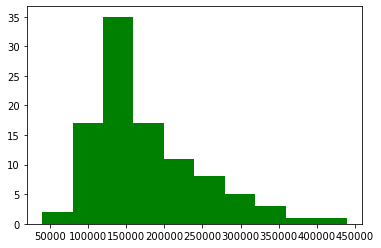

In [356]:
SalePrice = train['SalePrice']
print(SalePrice.describe())
plt.hist(SalePrice, color = 'g')
print(f"Skewness : {SalePrice.skew()}")

The histogram looks like a log normal distribution so we may want to scale it.
Let's look at the log of the sale price so that errors in predicting expensive houses and cheap houses will affect the result equally

Skewness of the log of the sale price: -0.09632240207755555


(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

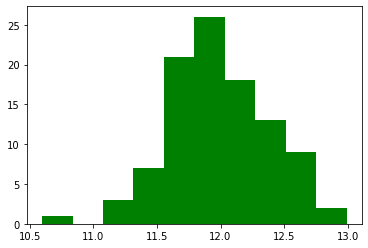

In [357]:
#set the target variable
target =  np.log(SalePrice)
print(f"Skewness of the log of the sale price: {target.skew()}")
plt.hist(target, color = 'g')

The plot looks a little bit more normally distributed.
We can also see the skew is quite significant.
When we look at the skew of the log, we see that it is reduced from over 1 to about -0.1

Based on our knowledge of the field, we assume that people may strongly consider the following data when buying a house or predicting a house price. 
So we're going to focus on those data in our data exploration :
+ OverallQual 
+ MasVnrArea
+ GrLivArea
+ GarageArea


[[1.         0.84335956]
 [0.84335956 1.        ]]


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

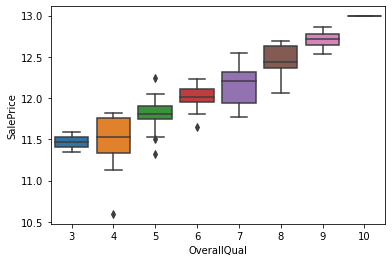

In [358]:
#Correlation matrix between OverallQual and target
print(np.corrcoef(train['OverallQual'], y=target))

#Relationship between OverallQual and target
sns.boxplot(x = 'OverallQual', y = target, data = train)

We can see that OverallQual is correlated to the target with a pearson correlation of 0.84.

Here we use box plot as OverallQual is a categorical feature and we see that SalePrice increases when OverallQual increases.

[[1.         0.53288067]
 [0.53288067 1.        ]]


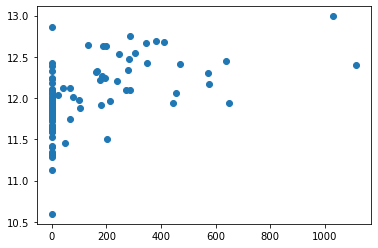

In [359]:
#Correlation matrix between MasVnrArea and target
print(np.corrcoef(train['MasVnrArea'], y=target))

#Relationship between MasVnrArea and target
plt.scatter(train['MasVnrArea'], y=target)

We can see a positive correlation between MasVnrArea and SalePrice but it is not a strong correlation.

[[1.         0.70001939]
 [0.70001939 1.        ]]


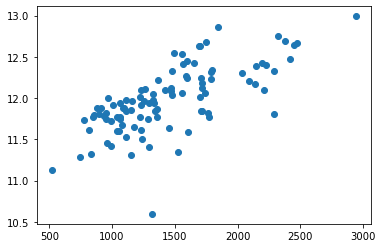

In [360]:
#Correlation matrix between GrLivArea and target
print(np.corrcoef(train['GrLivArea'], y=target))

#Relationship between GrLivArea and target
plt.scatter(train['GrLivArea'], y=target)

We can see that there is a positive correlation between the GrLivArea and the target.

[[1.         0.68540425]
 [0.68540425 1.        ]]


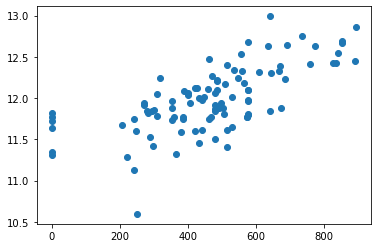

In [361]:
#Correlation matrix between GarageArea and target
print(np.corrcoef(train['GarageArea'], y=target))

#Relationship between GarageArea and target
plt.scatter(train['GarageArea'], y=target)

We notice a positive correlation between GarageArea and target. The data points are globally following a line pattern.

[Back to top](#Index)

### 2.3 Data Preparation

Before we deal with missing values, let's get rid of "Unnamed: 0" column and set "Id" column as index.

All the process is described below.


In [362]:
train = train.drop(columns = 'Unnamed: 0')

In [363]:
train = train.set_index('Id')
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [364]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
nulls

PoolQC          100
Alley            94
MiscFeature      91
Fence            77
FireplaceQu      54
LotFrontage      14
GarageCond        6
GarageType        6
GarageYrBlt       6
GarageFinish      6
GarageQual        6
BsmtCond          3
BsmtFinType2      3
BsmtQual          3
BsmtExposure      3
BsmtFinType1      3
Functional        0
MSSubClass        0
TotRmsAbvGrd      0
Fireplaces        0
dtype: int64

We see that we have a few nulls. For example, the poolQC has 100. The Alley has 94. Those data shouldn't be analyzed.

As we get down, there are some we might going to use. Therefore, we're going to repair them.

In [365]:
train = train.select_dtypes(include = [np.number]).fillna(train.mean()).dropna(axis=1)

print(sum(train.isnull().sum() != 0))
print(train.shape)

0
(100, 37)


C:\Users\Mamadou Baïlo CISSE\AppData\Local\Temp\ipykernel_43708\3257725322.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.select_dtypes(include = [np.number]).fillna(train.mean()).dropna(axis=1)


**To repair the data, we have** :
1. selected the numeric variables
2. applied the mean to fill the missing values
3. dropped the remaining columns that have not been treated by the mean function (PoolQC)
4. Controlled whether there are still missing values by computing the sum of null values

**We observe that there are no missing values**

[Back to top](#Index)

### 2.4 Correlation

To study the correlation between the variables, we are going to use the Heatmap chart. This will help us identify the variables that are the most correlated with the SalePrice. So we're going to explore different variables based on these correlations. Below we described how we selected the set of variables.

<AxesSubplot:>

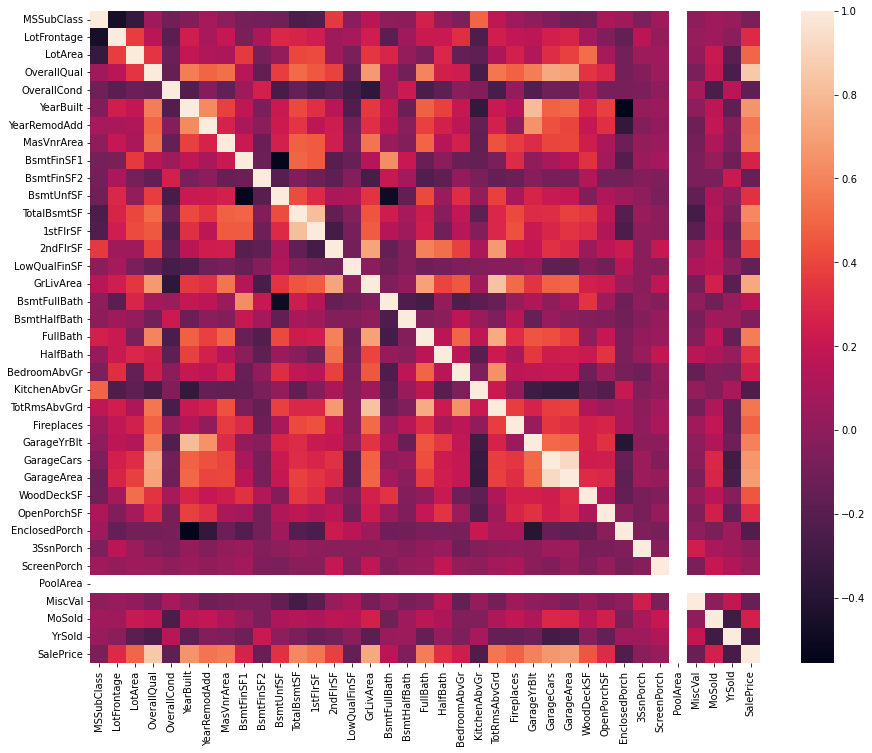

In [366]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat)

In [367]:
train['PoolArea'].unique()

array([0], dtype=int64)

The PoolArea **has only zeros**. We can get rid of it.

In [368]:
train = train.drop(columns = 'PoolArea')

<AxesSubplot:>

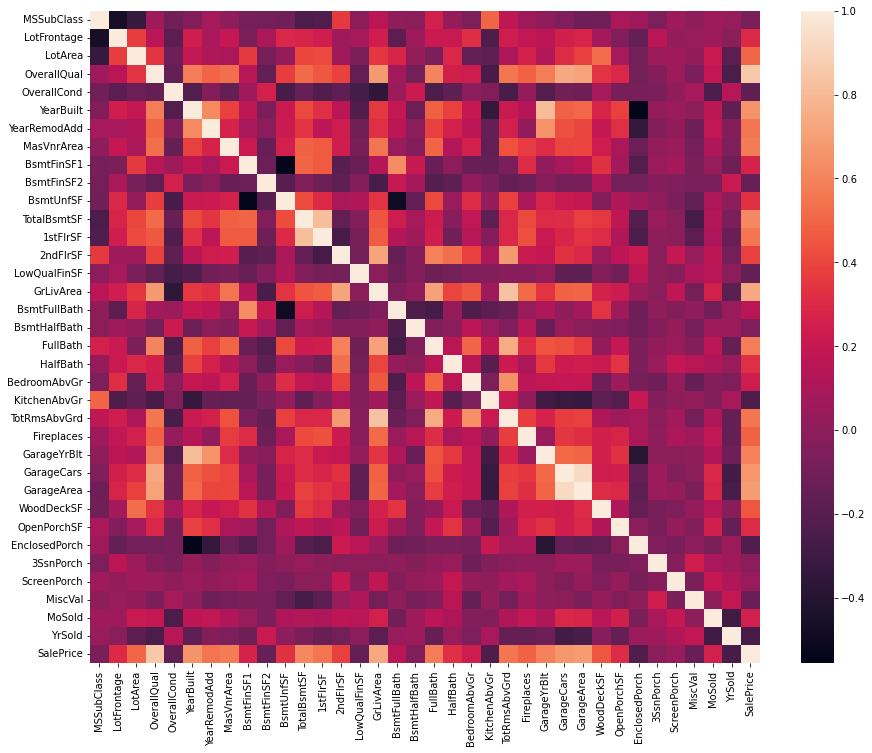

In [369]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat)

So far, we have been exploring data we thought were the most important features **based on our intuition**. Indeed, this is subjective. 
Now we feel the need to change our approach as engineer and make **a more objective analysis**.
That's where the correlation matrix comes in and helps us get a quick overview of our data and also the relationships.

After analyzing the correlation matrix, we'll now focus on **more features than we did during the data exploration**.

To achieve this, we selected the most correlated features with the SalePrice.
Below we selected the 10, 15 and 20 most correlated values with the SalePrice.

In [370]:
numberOfFeatures = (11, 16, 21) # Here we put 11, 16 ,and 21 because SalePrice is included 
# cols is a dictionary with 3 keys representing the numberOfFeatures 
# and the values representing the most 'numberOfFeatures' correlated features with the SalePrice
cols = {}
# Select numeric features from the train data set
numeric = train.select_dtypes(include = [np.number])
corr = numeric.corr()
for value in numberOfFeatures :
    cols[value] = corr['SalePrice'].sort_values(ascending = False)[0:value].index
print(cols)

corr['SalePrice'].sort_values(ascending = False)[0:21]

{11: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd'],
      dtype='object'), 16: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF'],
      dtype='object'), 21: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'BsmtUnfSF', 'HalfBath', 'OpenPorchSF',
       'LotFrontage'],
      dtype='object')}


SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.587388
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
1stFlrSF        0.550912
YearRemodAdd    0.548330
LotArea         0.497124
Fireplaces      0.487907
WoodDeckSF      0.451241
2ndFlrSF        0.381076
BsmtUnfSF       0.327020
HalfBath        0.319304
OpenPorchSF     0.301960
LotFrontage     0.299519
Name: SalePrice, dtype: float64


[Back to top](#Index)

## 3. Project Description

Our analysis improves upon the analysis performed by Dr. Williams as we use more correlated features with the SalePrice. 
In our analysis, we found linear relationships that makes us comfortable in using linear regression algorithm.

[Back to top](#Index)

### 3.1 Linear Regression

**The algorithm we use in this project is the linear regression algorithm.**

**What Is Linear Regression?**

Linear regression is a machine learning algorithm that is used to predict values within a continuous range (i.e., stocks’ price and height) rather than classifying them into categories (i.e., male or female).

The values that you want to predict are the dependent variable(s). The predictions can be made using one or more independent variables.

There are two types of linear regression: simple and multiple.

**Simple Linear Regression**

Simple linear regression is the most basic form of linear regression. Its mathematical formulation is based on the traditional equation of the line:

 **y = mx + b**,

where **x** is the independent variable, **y** is the dependent variable,  is the slope, and  is the intercept with the y-axis. In the context of linear regression, **x** represents the input variable that is used to make the prediction, whereas **y** represents the prediction. Additionally, in the context of machine learning, **m** is the weight and **b** is the bias.

One of the most important assumptions of linear regression is that the data has a linear relationship. However, in the real world, data is often not perfectly linear, but rather it will be in the form of a cluster of data points on a scatter plot. The goals of linear regression are to compute the line of best fit that describes the linear properties of the data and to determine how well this line fits the data in the cluster of points.

**Multiple Linear Regression**

Multiple linear regression can be viewed as a natural extension of simple linear regression. The main difference is that now multiple sets of data are used to make the prediction.

Therefore, the equation for multiple linear regression becomes:

**y = $m_{1}$$x_{1}$  + $m_{2}$$x_{2}$  + ... + $m_{n}$$x_{n}$+b**,


where **$x_{1}$, $x_{2}$, ..., $x_{n}$** represent the data points of all the independent variables used to make the prediction, **$m_{1}$, $m_{2}$, ..., $m_{n}$** are the weights, and b is the bias.

**To implement simple and multiple linear regression in Python, we need to :**
1. import linear_model from the sklearn module
2. instantiate the LinearRegression class
3. build our model by using the fit function
4. make predictions

[Back to top](#Index)

### 3.2 Analysis 

In this part, we build three models (model10, model15 ,and model20) and compute the three metrics R^2, MAE ,and MSE for comparison purpose. 

#### 3.2.1 Model based on the most 10-correlated features

Here we build the model based on the most 10-correlated numerical features and compute the metrics to evaluate the quality of the model.

In [371]:
# Set the independent variables
X = train[cols[11]]
# Set the dependent variable
Y = X['SalePrice']
# Drop the SalePrice from the independent variables
X = X.drop(['SalePrice'], axis = 1)

#Build the model
lr = linear_model.LinearRegression()
model10 = lr.fit(X,Y)
# Make the predictions
predictions10 = model10.predict(X)

# Print the metrics and the model weights
print(f"R^2 is : {r2_score(Y, predictions10)}")
print(f"Mean absolute error is : {mean_absolute_error(Y, predictions10)}")
print(f"Mean squared error is : {mean_squared_error(Y, predictions10)}")
print(f"Weights of the model are : {lr.coef_}")

# Store the metrics in metrics10 for comparison purpose
metrics10 = {'R2' : r2_score(Y, predictions10), 
           'MAE' : mean_absolute_error(Y, predictions10), 
           'MSE' : mean_squared_error(Y, predictions10)}

R^2 is : 0.8515791013699046
Mean absolute error is : 20719.306178762563
Mean squared error is : 766733216.2005004
Weights of the model are : [ 1.87159910e+04  5.14072102e+01  4.29212441e+01 -2.34507662e+03
  5.68933408e+02  2.50051289e+01 -5.58688717e+00 -6.83664567e+03
  1.03552163e+01 -2.03412902e+03]


85% of the prices are explained by the 10 independent variables.
We're improving upon the analysis performed by Dr. Williams on R^2 score.

(array([ 2.,  4.,  7., 23., 28., 18., 10.,  4.,  2.,  2.]),
 array([-74655.54361356, -58392.47032677, -42129.39703998, -25866.3237532 ,
         -9603.25046641,   6659.82282038,  22922.89610717,  39185.96939396,
         55449.04268075,  71712.11596753,  87975.18925432]),
 <BarContainer object of 10 artists>)

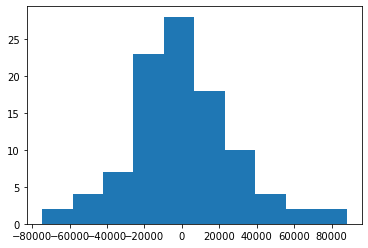

In [372]:
plt.hist(Y - predictions10)

The error Y - predictions should look like a normal distribution. And it is the case.

#### 3.2.2 Model based on the most 15-correlated features

In this section we build the model based on the most 15-correlated numerical features and compute the metrics to evaluate the quality of the model.

In [373]:
# Set the independent variables
X = train[cols[16]]
# Set the dependent variable
Y = X['SalePrice']
# Drop the SalePrice from the independent variables
X = X.drop(['SalePrice'], axis = 1)

# Build the model
lr = linear_model.LinearRegression()
model15 = lr.fit(X,Y)

# Make the predictions
predictions15 = model15.predict(X)

# Print the metrics and the model weights
print(f"R^2 is : {r2_score(Y, predictions15)}")
print(f"Mean absolute error is : {mean_absolute_error(Y, predictions15)}")
print(f"Mean squared error is : {mean_squared_error(Y, predictions15)}")
print(f"Weights of the model are : {lr.coef_}")

# Store the metrics in metrics15 for comparison purpose
metrics15 = {'R2' : r2_score(Y, predictions15), 
           'MAE' : mean_absolute_error(Y, predictions15), 
           'MSE' : mean_squared_error(Y, predictions15)}

R^2 is : 0.8822658267161307
Mean absolute error is : 18422.756760801367
Mean squared error is : 608207484.0661541
Weights of the model are : [ 1.52868908e+04  2.49384316e+01  3.96824760e+01 -5.10551609e+03
  4.12205315e+02  1.40355879e+01 -6.55147826e+00  9.28209552e+03
  2.35333255e+01 -2.38963560e+02 -5.89143455e-01  3.65927574e+02
  2.56601819e+00  7.72196531e+03  3.06083777e+01]


(array([ 1.,  0.,  5., 18., 26., 34.,  6.,  9.,  0.,  1.]),
 array([-87956.14168593, -70304.99984997, -52653.85801401, -35002.71617805,
        -17351.57434209,    299.56749387,  17950.70932983,  35601.85116579,
         53252.99300175,  70904.13483771,  88555.27667367]),
 <BarContainer object of 10 artists>)

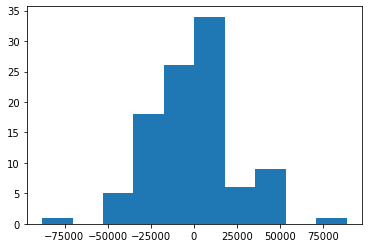

In [374]:
plt.hist(Y - predictions15)

Most of the errors Y - predictions should be around 0 and it is the case.

#### 3.2.3 Model based on the most 20-correlated features

Here we build the model based on the most 20-correlated numerical features and compute the metrics to evaluate the quality of the model.

In [375]:
# Set the independent variables
X = train[cols[21]]
# Set the dependent variable
Y = X['SalePrice']
# Drop the SalePrice from the independent variables
X = X.drop(['SalePrice'], axis = 1)

#Build the model
lr = linear_model.LinearRegression()
model20 = lr.fit(X,Y)

# Make the predictions
predictions20 = model20.predict(X)

# Print the metrics and the model weights
print(f"R^2 is : {r2_score(Y, predictions20)}")
print(f"Mean absolute error is : {mean_absolute_error(Y, predictions20)}")
print(f"Mean squared error is : {mean_squared_error(Y, predictions20)}")
print(f"Weights of the model are : {lr.coef_}")

# Store the metrics in metrics20 for comparison purpose
metrics20 = {'R2' : r2_score(Y, predictions20), 
           'MAE' : mean_absolute_error(Y, predictions20), 
           'MSE' : mean_squared_error(Y, predictions20)}

R^2 is : 0.8837595562987813
Mean absolute error is : 18356.270799324604
Mean squared error is : 600490969.0900935
Weights of the model are : [ 1.53682679e+04  2.22747131e+01  4.13005239e+01 -6.44962063e+03
  4.51525428e+02  1.21565375e+01  3.30857998e+01  5.75744123e+03
  2.25795524e+01 -1.44124198e+03  7.03614971e+00  3.75412975e+02
  2.47035518e+00  8.35571764e+03  3.27220133e+01  1.28457503e+01
  3.12304465e-01 -7.66785419e+03 -1.95285484e+01  7.67318730e+01]


(array([ 1.,  0.,  5., 19., 22., 35., 10.,  7.,  0.,  1.]),
 array([-8.87552339e+04, -7.10208128e+04, -5.32863916e+04, -3.55519704e+04,
        -1.78175493e+04, -8.31281268e+01,  1.76512930e+04,  3.53857142e+04,
         5.31201354e+04,  7.08545565e+04,  8.85889777e+04]),
 <BarContainer object of 10 artists>)

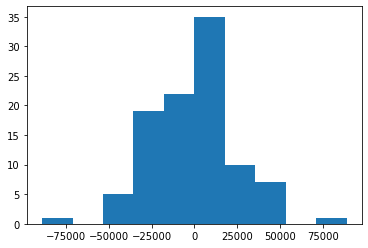

In [376]:
plt.hist(Y - predictions20)

Most of the errors Y - predictions should be around 0 and it is the case.

[Back to top](#Index)

### 3.3 Results

To evaluate the quality of the three models built based on different features, we use three metrics :

+ $R^2$ score, the coefficient of determination

The r2_score function computes the coefficient of determination, usually denoted as $R^2$

If $\hat{y}_{i}$ is the predicted value of the i-th sample and ${y}_{i}$ is the corresponding true value for total n-samples, the estimated $R^2$ is defined as:

$R^2$(y, $\hat{y}$) = 1 - $\frac{\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2}{\sum_{i=1}^{n} (y_{i} - \bar{y})^2}$

+ Mean absolute error

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss.

If $\hat{y}_{i}$ is the predicted value of the i-th sample, and ${y}_{i}$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{samples}-1$ is defined as


MAE(y, $\hat{y}$) = $\frac{1}{n_{samples}}$ $\sum_{i=0}^{n_{samples}-1} y_{i} - \hat{y}_{i}$     

+ Mean squared error

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

If $\hat{y}_{i}$ is the predicted value of the i-th sample, and ${y}_{i}$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{samples}-1$ is defined as

MSE(y, $\hat{y}$) = $\frac{1}{n_{samples}}$ $\sum_{i=0}^{n_{samples}-1} (y_{i} - \hat{y}_{i})^2$

In [377]:
# Here we set a dataframe with the metrics of the 3 models
index = ['model10', 'model15', 'model20']
columns = ['R2', 'MAE', 'MSE']
R2 = [metrics10['R2'],metrics15['R2'],metrics20['R2']]
MAE = [metrics10['MAE'],metrics15['MAE'],metrics20['MAE']]
MSE = [metrics10['MSE'],metrics15['MSE'],metrics20['MSE']]
data = {'R2' : R2, 'MAE' : MAE, 'MSE' : MSE}
results_df = pd.DataFrame(index = index, columns = columns, data = data)
results_df

,R2,MAE,MSE
model10,0.851579,20719.306179,7.667332e+08
model15,0.882266,18422.756761,6.082075e+08
model20,0.883760,18356.270799,6.004910e+08


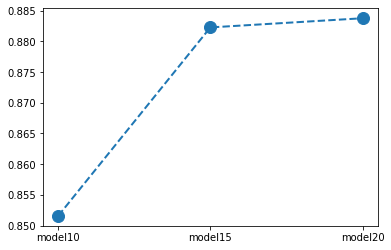

In [378]:
# plot R2
plt.plot(index, R2, 'o--', linewidth=2, markersize=12)

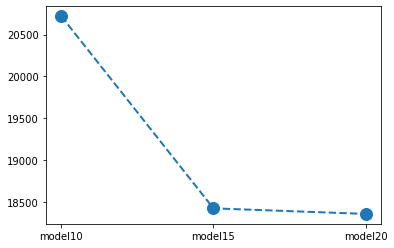

In [379]:
# plot MAE
plt.plot(index, MAE, 'o--', linewidth=2, markersize=12)

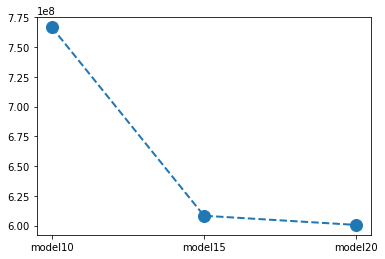

In [380]:
# plot MSE
plt.plot(index, MSE, 'o--', linewidth=2, markersize=12)

**After analyzing the different metrics, we conclude that model20 built with the 20-most correlated features to the SalePrice is the one that performs better because it has the highest R^2 and the lowest MAE and MSE compared to model10 and model15.**

This can be explained by the fact that we included more correlated features in model20 that might explain the SalePrice.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

In this section, we test our model against the test data to confirm the accuracy on new data.
To do so, we use the model that performs the best, which is the model20.
We see that the results are not in accordance with what we found earlier. We can justify this by the fact that the test data is data that our model20 haven't seen.

In [381]:
# Read the test file and see how it looks like
test = pd.read_csv('jtest.csv')
print(test.shape)
test.head()

(100, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [382]:
# Here we fill the NaN values with the mean as we did for the train dataset
test = test.select_dtypes(include = [np.number]).fillna(test.mean())
print(test.shape)
test.head()

(100, 39)


C:\Users\Mamadou Baïlo CISSE\AppData\Local\Temp\ipykernel_43708\3385520139.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.select_dtypes(include = [np.number]).fillna(test.mean())


,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,100,101,20,72.910256,10603,6,7,1977,2001,28.0,...,168,68,0,0,0,0,0,2,2010,205000
1,101,102,60,77.000000,9206,6,5,1985,1985,336.0,...,192,46,0,0,0,0,0,6,2010,178000
2,102,103,90,64.000000,7018,5,5,1979,1979,0.0,...,0,0,0,0,0,0,0,6,2009,118964
3,103,104,20,94.000000,10402,7,5,2009,2009,0.0,...,0,36,0,0,0,0,0,5,2010,198900
4,104,105,50,72.910256,7758,7,4,1931,1950,600.0,...,0,0,0,0,184,0,0,6,2007,169500


In [383]:
# Set the independent variables
X = test[cols[21]]
# Set the dependent variable
Y = X['SalePrice']
# Drop the SalePrice from the independent variables
X = X.drop(['SalePrice'], axis = 1)
X.head()

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF,2ndFlrSF,BsmtUnfSF,HalfBath,OpenPorchSF,LotFrontage
0,6,1610,480,2,1977,1610,1977.0,2,28.0,6,1610,2001,10603,2,168,0,410,0,68,72.910256
1,6,1732,476,2,1985,741,1985.0,2,336.0,7,977,1985,9206,1,192,755,741,1,46,77.000000
2,5,1535,410,2,1979,0,1979.0,2,0.0,8,1535,1979,7018,0,0,0,0,0,0,64.000000
3,7,1226,740,3,2009,1226,2009.0,2,0.0,6,1226,2009,10402,0,0,0,1226,0,36,94.000000
4,7,1818,240,1,1931,1040,1951.0,1,600.0,7,1226,1950,7758,2,0,592,816,1,0,72.910256


In [384]:
#Make the predictions
predictions = model20.predict(X)
print(f"R^2 is : {model20.score(X,Y)}")

R^2 is : 0.7450940100573108


**On the data we haven't seen (0.74), we're not as good as the train data.
We were 0.88 on the training data set with model20.**

Now when we compare how our model20 performs on the test data set (0.74) against Dr. Williams model (0.74), we see that we perform the same.

By adding further transformation steps on the training data, we might perform better on test data.
The transformations we're going to apply are the following :

1. We first merge the train and test set so that both can undergo the same preparation steps
2. We apply the data preparation performed in section **2.4 Data preparation** 
3. We impute categorical (ordinal and nominal) features by using **'most_frequent' imputation strategy**
4. We **identify the ordinal categorical features** (based on the data description file),and **convert their values into numeric values**. As a result, we have more numeric columns in the dataset that we can use to compute the correlations with the SalePrice and get a new set of correlated features. As previously, we're going to select the most 20-correlated features with the SalePrice
5. To leverage the nominal categorical features, we use **ANOVA** (ANalysis Of VAriance) technique to get the best correlated nominal features with the SalePrice. We're going to choose the ones with a p-value less than 0.05. Then we apply **One Hot Encoding** to the selected nominal features.
6. Finally we combine the data in steps 4 and 5 and build a new model **NewModel**.

In [385]:
# 1. We first merge the train and test set so that both can undergo the same preparation steps

train = pd.read_csv('houseSmallData.csv')
test = pd.read_csv('jtest.csv')
dataset = pd.concat([train, test])

# We apply the data preparation performed in section **2.4 Data preparation** 

dataset = dataset.drop(columns = 'Unnamed: 0')
dataset = dataset.set_index('Id')

numerical_features = dataset.select_dtypes(include = [np.number]).fillna(dataset.mean()).dropna(axis=1)

# 3. Impute categorical (ordinal and nominal) features by using **'most_frequent' imputation strategy**

categorical_features = dataset.select_dtypes(exclude = [np.number])
imputer = SimpleImputer(strategy = 'most_frequent')
categorical_features = pd.DataFrame(imputer.fit_transform(categorical_features), columns = categorical_features.columns)


# 4. **Identify the ordinal categorical features** (based on the data description file),and **convert their values into 
# numeric values**. As a result, we have more numeric values in the dataseting dataset that we can use to compute the 
# correlations with the SalePrice and get a new set of correlated features. As previously, we're going to select the most 20-
# correlated features with the SalePrice

categorical_features['ExterQual'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['ExterCond'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['BsmtQual'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['BsmtCond'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['HeatingQC'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['KitchenQual'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['FireplaceQu'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['GarageQual'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['GarageCond'] = categorical_features['ExterQual'].replace(['Po','Fa','TA','Gd', 'Ex'],[1, 2, 3, 4, 5])
categorical_features['BsmtExposure'] = categorical_features['ExterQual'].replace(['Gd','Av','Mn','No'],[1, 2, 3, 4])
categorical_features['BsmtFinType1'] = categorical_features['ExterQual'].replace(['Unf','LwQ','Rec','BLQ', 'ALQ', 'GLQ'],[1, 2, 3, 4, 5, 6])
categorical_features['BsmtFinType2'] = categorical_features['ExterQual'].replace(['Unf','LwQ','Rec','BLQ', 'ALQ', 'GLQ'],[1, 2, 3, 4, 5, 6])

categorical_features.index = dataset.index
dataset = pd.concat([numerical_features,categorical_features], axis = 1)


numerical_features = dataset.select_dtypes(include = [np.number])

corr = numerical_features.corr()
numericCols = corr['SalePrice'].sort_values(ascending = False)[0:21].index
numerical_features = numerical_features[numericCols]


# 5. To leverage the nominal categorical features, we use **ANOVA** technique to get the best correlated nominal features 
# with the SalePrice. We're going to choose the ones with a p-value less than 0.05. Then we apply **One Hot Encoding** 
# to the selected nominal features.


categorical_features = dataset.select_dtypes(exclude = [np.number]) # Now we only have nominal categorical features in categorical features


# We add the SalePrice column to categorical_features to perform the ANOVA

categorical_features = pd.concat([categorical_features,numerical_features[['SalePrice']]], axis = 1)


# Using ANOVA with the SalePrice, we select nominal categorical columns with a p-value less than 0.05

anovaCols = []
p_values = []
for categorical_column in categorical_features.columns :
    CategoryGroupLists=categorical_features.groupby(categorical_column)['SalePrice'].apply(list)
    if len(CategoryGroupLists) > 2 :
        AnovaResults = f_oneway(*CategoryGroupLists)
        if AnovaResults[1] < 0.05 :
            anovaCols.append(categorical_column)
            p_values.append(AnovaResults[1])

p_values_df = pd.DataFrame(index = anovaCols, data=p_values)

categorical_cols = p_values_df[0].sort_values(ascending = True)[:9].index
categorical_cols = categorical_cols.delete(0)

            
categorical_features = categorical_features.drop('SalePrice', axis = 1) 

dummies = pd.get_dummies(categorical_features[categorical_cols], columns = categorical_cols)


# 6. Finally we combine the data in steps 4 and 5 and build a **new model**.

dataset = pd.concat([numerical_features, dummies], axis = 1)
# After the transformation steps, let's look at the shape of the dataset 
print(f"After transformation steps, this is the shape of the dataset (train and test) : {dataset.shape}")

# Select the train dataset which is the top 100
X = dataset.iloc[:100]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

lr = linear_model.LinearRegression()
NewModel = lr.fit(X,Y)
predictions = NewModel.predict(X)
print(f"R^2 is : {r2_score(Y, predictions)}")
print(f"Mean absolute error is : {mean_absolute_error(Y, predictions)}")
print(f"Mean squared error is : {mean_squared_error(Y, predictions)}")
print(f"Weights of the model are : {lr.coef_}")

# Store the metrics in metricsNewModel for comparison purpose
metricsNewModel = {'R2' : r2_score(Y, predictions), 
           'MAE' : mean_absolute_error(Y, predictions), 
           'MSE' : mean_squared_error(Y, predictions)}



After transformation steps, this is the shape of the dataset (train and test) : (200, 75)
R^2 is : 0.9558183056541933
Mean absolute error is : 11062.081585206815
Mean squared error is : 228239910.3873829
Weights of the model are : [ 1.16025604e+04  4.94915092e+01  8.40908442e+01  1.48821852e+03
  1.48821852e+03  1.48821852e+03  1.48821852e+03  1.48821852e+03
  1.48821852e+03  1.48821852e+03  1.48821852e+03  1.48821852e+03
  1.48821852e+03  1.48821852e+03  1.48821852e+03 -6.96996683e+03
 -4.38256758e+03  3.41880533e+01 -1.18368152e+01 -2.55646205e+01
 -9.87032721e+03 -5.26810512e+04 -3.11549998e+02  3.35771497e+03
 -3.98065607e+04 -4.41844370e+03 -2.94819085e+03 -2.00038771e+04
  5.76447406e+03 -8.23190585e+03  6.54836185e-11 -1.85256786e+04
 -3.10573006e+03  2.66191188e+04 -1.63187598e+04 -1.46606169e+04
 -9.16497423e+03  4.05668148e+04  8.31405013e+04  9.52319539e+02
  3.96467227e+04  1.92391310e+03 -4.86502539e+03  2.94111229e+03
 -2.25170773e+04  3.40495763e+03  1.17834967e+04  7.32

C:\Users\Mamadou Baïlo CISSE\AppData\Local\Temp\ipykernel_43708\4109320530.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numerical_features = dataset.select_dtypes(include = [np.number]).fillna(dataset.mean()).dropna(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [386]:
# Here we set a dataframe with the metrics of the 3 models built in the first part of the notebook
# and we add the metrics of the new model "NewModel"
index = ['model10', 'model15', 'model20', 'NewModel']
columns = ['R2', 'MAE', 'MSE']
R2 = [metrics10['R2'],metrics15['R2'],metrics20['R2'], metricsNewModel['R2']]
MAE = [metrics10['MAE'],metrics15['MAE'],metrics20['MAE'], metricsNewModel['MAE']]
MSE = [metrics10['MSE'],metrics15['MSE'],metrics20['MSE'], metricsNewModel['MSE']]
data = {'R2' : R2, 'MAE' : MAE, 'MSE' : MSE}
results_df = pd.DataFrame(index = index, columns = columns, data = data)
results_df

,R2,MAE,MSE
model10,0.851579,20719.306179,7.667332e+08
model15,0.882266,18422.756761,6.082075e+08
model20,0.883760,18356.270799,6.004910e+08
NewModel,0.955818,11062.081585,2.282399e+08


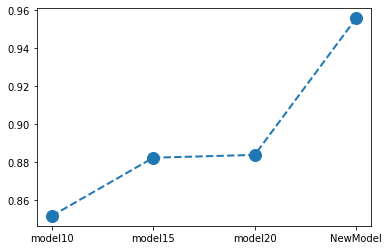

In [387]:
# plot R2
plt.plot(index, R2, 'o--', linewidth=2, markersize=12)

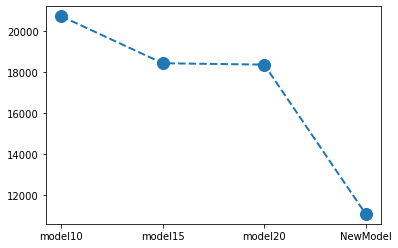

In [388]:
# plot MAE
plt.plot(index, MAE, 'o--', linewidth=2, markersize=12)

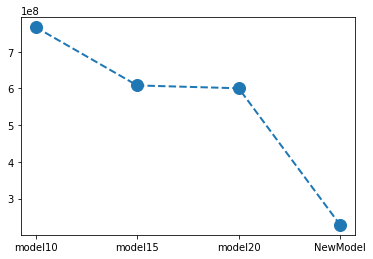

In [389]:
# plot MSE
plt.plot(index, MSE, 'o--', linewidth=2, markersize=12)

**After analyzing the different metrics, we conclude that the model NewModel built using further transformations performs better because it has the highest R^2 and the lowest MAE and MSE compared to model10, model15 ,and model20.**

This can be explained by the fact that we included more correlated features (including categorical ones) that might explain the SalePrice.

We apply the new model NewModel to predict the house prices in the test dataset

In [390]:
# Select the test data
X = dataset.iloc[100:]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

predictions = NewModel.predict(X)
print(f"R^2 is : {r2_score(Y, predictions)}")
print(f"Mean absolute error is : {mean_absolute_error(Y, predictions)}")
print(f"Mean squared error is : {mean_squared_error(Y, predictions)}")

R^2 is : 0.7843087776199421
Mean absolute error is : 26991.08248353684
Mean squared error is : 1374554445.415751


We can see that the model **NewModel** also performs better on test data (0.78) compared to the model20 (0.74) and Dr. Williams model on test data(0.74).

[Back to top](#Index)

## Conclusion

To sum up, in the first part of the notebook, we demonstrated that we performed better with model20 that is built with the most 20-correlated features with the SalePrice. 

In the second part of the notebook, by applying further transformations and including the categorical features in the analysis, we built a new model "NewModel" that performed better than model20.
This demonstrates the importance of data cleaning and analysis techniques when creating a prediction model. We need to know well our data and transform them the way we can get the features that explain the best the dependent variables.

In this project, we learned techniques such as imputation strategies for categorical variables ,and ANOVA to analyze the correlation between a categorical and a numerical variable ,and we also learned the metrics MAE (Mean Absolute Error) ,and MSE (Mean Squared Error) for model evaluation. However, we faced some difficulties when dealing with dummy variables.

Linear regression is just one algorithm in the machine learning world. We could have used other algorithms such as Lasso or XGBoost.


[Back to top](#Index
)
## References


- MIT XPRO, 2022. https://student.emeritus.org/courses/4750/pages/making-predictions-with-linear-regression?module_item_id=1302803

- Hashmi, Farukh. "Thinking neuron" Thinking neuron. Thinking Neuron, 2022. https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

- Scikit learn, 2022. https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics